# Emma and Michael's Dank Boio Modeling and Simulation in Python (Copyright Allen B. Downey) Project Number 3 in the Eleventh Month of the Two Thousand and Eighteenth Year

In [150]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import math


In [151]:
x_0 = 362600000 # 362,600 km at perigee
v_0 = 1078.2 # 1078.2 m/s at perigee
Me_0 = 5.9722e24 # 5.9722×10^24 kg
Mm_0 = 7.342e22 # 7.342×10^22 kg

init = State(Me = Me_0, # Initial mass of earth
             Mm = Mm_0, #Initial mass of moon
             x_m=x_0, # 362,600 km at perigee
             y_m=0,
             vx_m=0,
             vy_m=v_0, # 1078.2 m/s at perigee
             x_e = 0,
             y_e = 0,
             vx_e = 0,
             vy_e = 0
            )


,values
Me,5.972200e+24
Mm,7.342000e+22
x_m,3.626000e+08
y_m,0.000000e+00
vx_m,0.000000e+00
vy_m,1.078200e+03
x_e,0.000000e+00
y_e,0.000000e+00
vx_e,0.000000e+00
vy_e,0.000000e+00


In [152]:
num_rockets = 2.2e8

def earth_radius(mass):
    density = 5514 # 5514 kg/m3 from NASA Earth Fact Sheet
    Re = (3*mass / (4*pi*density))**(1/3)
    return Re

def moon_radius(mass):
    density = 3344 # 3344 kg/m3 from NASA Moon Fact Sheet
    Rm = (3*mass / (4*pi*density))**(1/3)
    return Rm
def make_system()
system = System(init=init,
                dmdt = 6.54e6*num_rockets, #kg/s,
                r_e = earth_radius,
                r_m = moon_radius,
                G=6.674e-11, #N / kg**2 * m**2
                t_0=0,
                t_end=5*365*24*60*60) 

,values
init,Me 5.972200e+24 Mm 7.342000e+22 x_m ...
dmdt,1.45188e+15
r_e,<function earth_radius at 0x0000029CAA58D0D0>
r_m,<function moon_radius at 0x0000029CAA58D840>
G,6.674e-11
t_0,0
t_end,157680000


In [153]:
def net_force_moon(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e = state
    unpack(system)
    
    #Gravitational Force
    r = sqrt((x_m-x_e)**2 + (y_m-y_e)**2)
    force= G * Me * Mm / r**2
    direction = math.atan2(y_m-y_e,x_m-x_e) + pi 
    gravitational_force = Vector(force * math.cos(direction), force*math.sin(direction) )
    
    # Moon momentum contribution
    collision_force = dmdt * -(Vector(vx_m,vy_m))
    
    return gravitational_force + collision_force

In [154]:
def net_force_earth(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e = state
    unpack(system)
    
    #Gravitational Force
    r = sqrt((x_m-x_e)**2 + (y_m-y_e)**2)
    force= G * Me * Mm / r**2
    direction = math.atan2(y_m-y_e,x_m-x_e)
    gravitational_force = Vector(force * math.cos(direction), force*math.sin(direction) )
    
    return gravitational_force

In [155]:
print(net_force_moon(init, system))
print(net_force_earth(init, system))

[-2.22576509e+20 -1.56541702e+18] dimensionless
[2.22576509e+20 0.00000000e+00] dimensionless


In [156]:
def slope_func(state,t,system):
    
    Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e = state
    unpack(system)
    V_m = Vector(vx_m,vy_m)
    V_e = Vector(vx_e,vy_e)
    
    Fnet_m = net_force_moon(state,system)
    Fnet_e = net_force_earth(state,system)
    
    dMedt = -dmdt
    dMmdt = dmdt
    dxdt_m = V_m
    dvdt_m = Fnet_m / Mm
    dxdt_e = V_e
    dvdt_e = Fnet_e / Me
    
    return dMedt, dMmdt, dxdt_m[0], dxdt_m[1], dvdt_m[0], dvdt_m[1], dxdt_e[0], dxdt_e[1], dvdt_e[0], dvdt_e[1],

In [157]:
slope_func(init, 0, system)

(-1451880000000000.0,
 1451880000000000.0,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(1078.2, 'dimensionless')>,
 <Quantity(-0.0030315514688456138, 'dimensionless')>,
 <Quantity(-2.1321397657313716e-05, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(3.726876341091138e-05, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>)

In [158]:
def event_func(state,t,system):
    Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e = state
    unpack(system)
   
    r = sqrt(x_m**2 + y_m**2)
    r_collision = earth_radius(Me) + moon_radius(Mm)
    
    return r - r_collision

def event_func(state,t,system):
    Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e = state
    unpack(system)
   
    r = sqrt((x_m-x_e)**2 + (y_m-y_e)**2)
    collision_radius = earth_radius(Me) + moon_radius(Mm)
    
    #End the simulart if there is a collision OR if the orbital radius exceeds its initial value at apogee
    if(Me < 0):
        print('Negative mass is really sad...')
        return 0
    elif(r > 0.4055e10): # e9 originally
        print('The moon escaped our experiment!')
        return 0
    else:
        return r - collision_radius


In [159]:
event_func(init,0,system)

354492134.3300541

In [160]:
def error_func(rockets, system):
    
    
    results, details = run_ode_solver(system, slope_func,events=event_func, method="LSODA")


,values
sol,None
t_events,[[96190967.72823274]]
nfev,34559
njev,245
nlu,245
status,1
message,A termination event occurred.
success,True


In [161]:
results.index /= 24*60*60

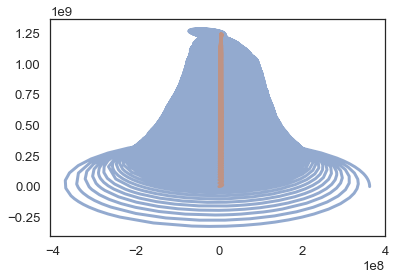

In [162]:
plot(results.x_m,results.y_m)
plot(results.x_e,results.y_e)

In [163]:
results.index[-1]/365

3.050195577379273

In [164]:
results.head()

,Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e
0.000000e+00,5.972200e+24,7.342000e+22,362600000.0,0.000000,0.000000e+00,1078.2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3.394587e-13,5.972200e+24,7.342000e+22,362600000.0,0.000032,-8.891307e-11,1078.2,3.205873e-20,0.000000e+00,1.093064e-12,9.532742e-26
6.789174e-13,5.972200e+24,7.342000e+22,362600000.0,0.000063,-1.778261e-10,1078.2,9.617619e-20,5.591760e-33,2.186128e-12,2.859823e-25
3.395266e-09,5.972200e+24,7.342000e+22,362600000.0,0.316291,-8.893086e-07,1078.2,1.603578e-12,6.992497e-22,1.093283e-08,4.768278e-18
6.789853e-09,5.972200e+24,7.342000e+22,362600000.0,0.632519,-1.778439e-06,1078.2,6.413029e-12,4.194939e-21,2.186347e-08,1.906930e-17


In [165]:
results.tail()

,Me,Mm,x_m,y_m,vx_m,vy_m,x_e,y_e,vx_e,vy_e
1113.313084,5.832543e+24,2.130767e+23,8.016725e+06,1.236186e+09,5990.429268,5421.975361,4.350093e+06,1.245736e+09,-218.840171,-184.827805
1113.316005,5.832543e+24,2.130771e+23,9.470558e+06,1.237666e+09,5529.270916,6313.269073,4.296982e+06,1.245685e+09,-201.993301,-217.389285
1113.318149,5.832543e+24,2.130773e+23,1.044802e+07,1.238895e+09,5023.546784,6962.942028,4.261274e+06,1.245643e+09,-183.518190,-241.123749
1113.320293,5.832542e+24,2.130776e+23,1.131790e+07,1.240240e+09,4368.084477,7555.401006,4.229496e+06,1.245596e+09,-159.572716,-262.768102
1113.321386,5.832542e+24,2.130777e+23,1.171133e+07,1.240964e+09,3981.376385,7818.535381,4.215123e+06,1.245571e+09,-145.445378,-272.381253
